In [ ]:
# Running in Google Colab? Run this cell
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/exoplanet_data.csv

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

--2024-06-09 19:34:40--  https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_3/data/exoplanet_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 619568 (605K) [text/plain]
Saving to: ‘exoplanet_data.csv’

exoplanet_data.csv  100%[===================>] 605.05K  --.-KB/s    in 0.03s   

2024-06-09 19:34:41 (20.3 MB/s) - ‘exoplanet_data.csv’ saved [619568/619568]



# Challenge Problem 2: Exoplanets with Pandas

Before loading it into Python, open up the file named `exoplanet_data.csv` and take a quick look at its contents. The file starts with many lines of comments. In particular, there are descriptions of each of the columns included in the file. Most of them are somewhat clear, but there are two that aren't which you should ignore when doing the problem, which I will describe briefly.
*    `loc_rowid`: The table in the file doesn't actually correspond to the whole database, so the values in this column tell you the original row indices in the full dataset.
*    `default_flag`: For each planet, there can be more than one "solution" for the set of observations. This flag indicates whether the row is the "default" solution. I chose only the subset of rows where this value is 1, corresponding to the default solutions.

One important thing to mention is that I downloaded a version of this data excluding the error bars. In reality, all these measurements come with some amount of uncertainty.

Now, open the file using `pd.read_csv`.
*   The file is already comma-separated, so no need to pass a separator
*   You can use either `header=0` or pass your own list of names if you don't like the ones in the file.
*   You can optionally exclude the two columns I mentioned above with `usecols` but it's probably more trouble than it's worth.
*   You want to ignore the lines of comments, so make sure to use `comment=#`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('exoplanet_data.csv', comment='#')

Your main tasks:
1.   For starters, how many rows does the DataFrame contain? This translates to the total number of confirmed exoplanets.
2.   How many different exoplanet detection methods are there? You can get the unique values of a column by using the method `df['Columnname'].unique()`.
3.   Make a cumulative histogram showing how the number of known exoplanets has grown over time. Make a second version where you break this down by detection method. Do you notice any years with very drastic increases?


In [ ]:
print(f'The dataframe contains {len(df.index)} rows')
print(f'There are {len(df.discoverymethod.unique())} unique detection methods')

The dataframe contains 5030 rows
There are 11 unique detection methods


Text(0.5, 0, 'Discovery Year')

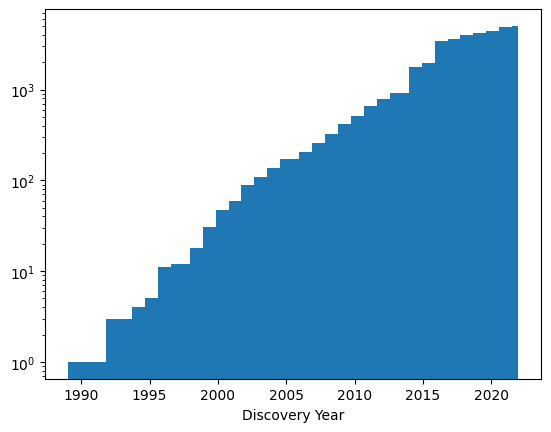

In [ ]:
plt.hist(df.disc_year, cumulative=True, bins=int(np.sqrt(len(df.index))))
plt.yscale('log')
plt.xlabel('Discovery Year')

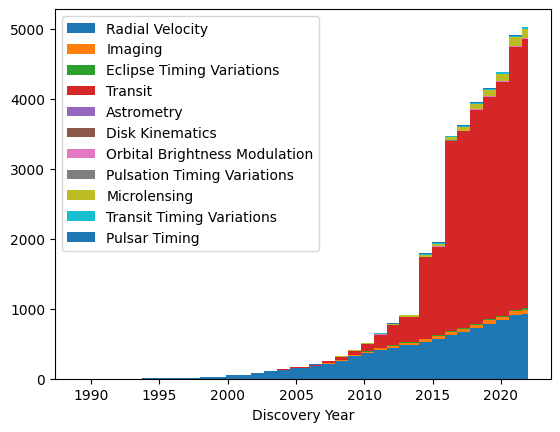

In [ ]:
df_list = []
for method in df.discoverymethod.unique():
    df_list.append(df[df.discoverymethod==method].disc_year.values)
_,_,_ = plt.hist(df_list, stacked=True, bins=int(np.sqrt(len(df.index))),label=df.discoverymethod.unique(),cumulative=True)
plt.xlabel('Discovery Year')
plt.legend()


Optional tasks if you have time:
*   Now, make some histograms of some of the physical values, including exoplanet radius, semimajor axis, host star mass, etc. For your histogram of the exoplanet mass, restrict yourself to the rows where `pl_bmassprov=='Mass'` instead of `Msini`. Do you notice anything interesting? For example, you should find that most host stars will have masses around 1 solar mass. This is because most exoplanet surveys have purposefully targeted stars similar to our own Sun. Other things to look into: Are there more planets further away than close to us? Does planetary radius or mass seem to peak at any specific values?
*   Kepler derived his third law from actual observations of the solar system planets where he plotted the semimajor axis vs the orbital period. Try doing this with log-log axes. When you do this for the solar system planets, you get a straight line. What do you notice in this case?
*   Is there any correlation between distance from the star and planetary mass or radius? Make some scatter plots to investigate this.
*   From the planetary mass and radius, you can get the planetary density. Make a histogram of this. What do you notice?
*   Anything else you can think of! Try stuff out.

Keep in mind that some of the conclusions you draw here might not be true. Observations are prone to some level of bias, also known as "selection effects". For example, it's very hard to directly image exoplanets that are small and close to their host star, so the method of direct imaging is biased towards larger exoplanets and larger distances. Each detection method is biased in some way, so take some of your conclusions with a grain of salt.

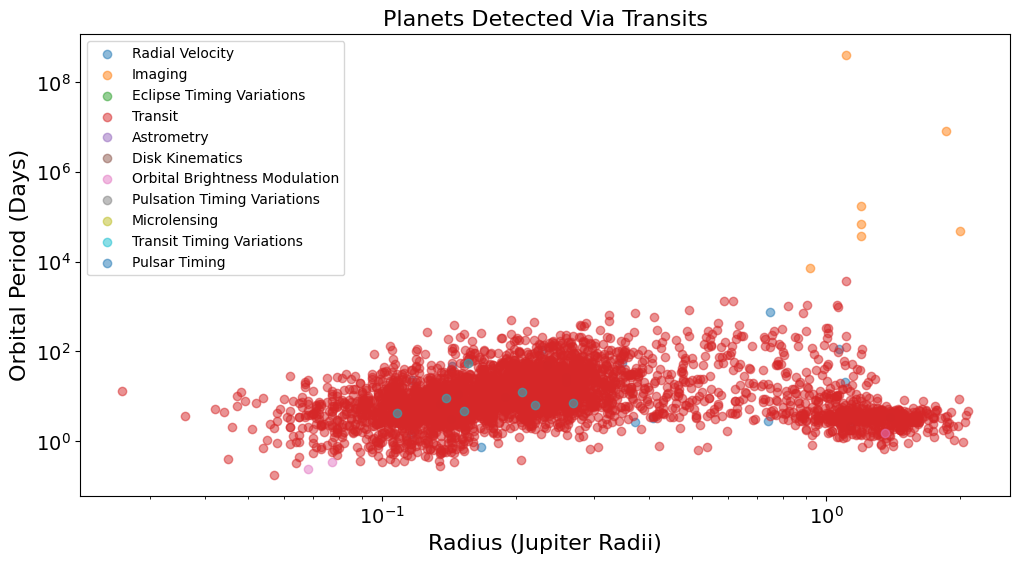

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
for method in df.discoverymethod.unique():
    plt.scatter(df[df.discoverymethod==method].pl_radj, df[df.discoverymethod==method].pl_orbper, alpha=0.5,label=method)
plt.xlabel('Radius (Jupiter Radii)', fontsize=16)
plt.ylabel('Orbital Period (Days)', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.title('Planets Detected Via Transits', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

In [ ]:
grouped_df = df.groupby("hostname").first()

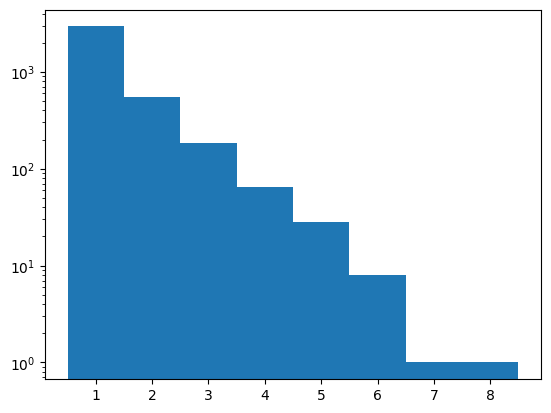

In [ ]:
bins = np.arange(1, max(grouped_df.sy_pnum.values) + 1.5) - 0.5
plt.hist(grouped_df.sy_pnum, bins=bins)
plt.yscale('log')